In [1]:
from models.dcgan import DCGAN
from models.discriminator import create_discriminator
from models.generator import create_generator, test_generator
from keras.optimizers import Adam
from utils.image_utils import read_collection
from utils.file_utils import make_directory
from utils.benchmark_utils import time_stamp, get_time
from utils.visualization_utils import save_plot
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import config

2023-03-09 17:03:31.910538: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
test_gen = tf.keras.models.load_model('./dcgan-2/generator/')
z = tf.random.normal([1, config.Z_DIM])
image = test_gen.predict(z)[0, :, :, :]
image = (1/(2*2.25)) * image + 0.5
plt.imsave('prediction.png', image)

1/1 [==============================] - 0s 169ms/step


In [2]:
generator = create_generator(z=config.Z_DIM)
discriminator = create_discriminator(img_shape=config.IMG_SHAPE)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              264192    
                                                                 
 reshape (Reshape)           (None, 4, 4, 128)         0         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 4, 4, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 128)      262272    
 nspose)                                                         
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 16, 16, 64)       73792     
 ranspose)                                              

2023-03-03 23:41:25.512034: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 3)       12        
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 3)       84        
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 3)      12        
 ormalization)                                                   
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 128, 128, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 16)       64        
 hNormalization)                                      

In [3]:
generator.compile(loss='binary_crossentropy',
                 optimizer=Adam(learning_rate=0.0002, beta_1=0.4))

In [4]:
discriminator.compile(loss='binary_crossentropy', 
                     optimizer=Adam(learning_rate=0.0002, beta_1=0.4),
                      metrics=['accuracy'])

In [5]:
discriminator.trainable = False

In [6]:
dcgan = DCGAN(generator, discriminator)
dcgan.compile(loss='binary_crossentropy',
             optimizer=Adam())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       623779    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 242893    
                                                                 
Total params: 866,672
Trainable params: 623,779
Non-trainable params: 242,893
_________________________________________________________________


In [8]:
discriminator_losses = []
gan_losses = []

In [9]:
data_images = read_collection(config.DATA_TRAINING_PATH, 'png')

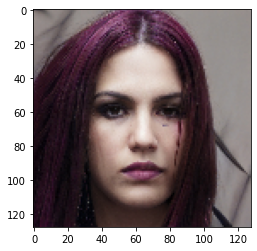

In [10]:
plt.imshow(data_images[0])

In [11]:
time_stamp("Generating labels ...", get_time())
real_labels = np.ones((config.BATCH_SIZE, 1))
fake_labels = np.zeros((config.BATCH_SIZE, 1))
time_stamp("Finishing ...", get_time())

Generating labels ... - Fri Mar  3 23:41:40 2023
Finishing ... - Fri Mar  3 23:41:40 2023


In [12]:
make_directory(config.MODEL_FOLDER_NAME)
make_directory(f'{config.MODEL_FOLDER_NAME}/predictions')

In [13]:
ls

LICENSE         Test.ipynb      data/           results/        trained-models/
Lapses.ipynb    __pycache__/    model-py-test/  train-tpdne-64/ utils/
README.md       config.py       models/         train.py


1/1 [==============================] - 0s 68ms/step
Iteration 10, [D loss: 0.091864, acc.:98.44%] [G loss: 1.690997]
1/1 [==============================] - 0s 145ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 67ms/step
Iteration 20, [D loss: 0.041362, acc.:100.00%] [G loss: 0.031511]
1/1 [==============================] - 0s 33ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 67ms/step
Iteration 30, [D loss: 0.014805, acc.:100.00%] [G loss: 0.000673]
1/1 [==============================] - 0s 31ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 66ms/step
Iteration 40, [D loss: 0.003664, acc.:100.00%] [G loss: 0.000445]
1/1 [==============================] - 0s 34ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 66ms/step
Iteration 50, [D loss: 0.004499, acc.:100.00%] [G loss: 0.000227]
1/1 [==============================] - 0s 34ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 67ms/step
Iteration 60, [D loss: 0.004236, acc.:100.00%] [G loss: 0.000182]
1/1 [==============================] - 0s 36ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 69ms/step
Iteration 70, [D loss: 0.002119, acc.:100.00%] [G loss: 0.000103]
1/1 [==============================] - 0s 39ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 73ms/step


KeyboardInterrupt: 

<Figure size 216x216 with 0 Axes>

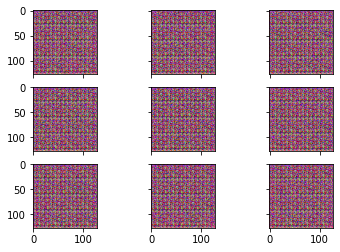

<Figure size 216x216 with 0 Axes>

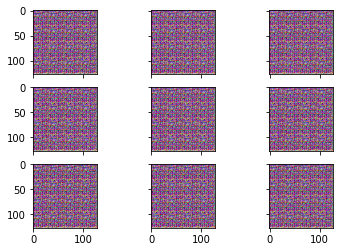

<Figure size 216x216 with 0 Axes>

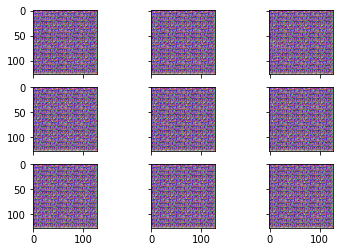

<Figure size 216x216 with 0 Axes>

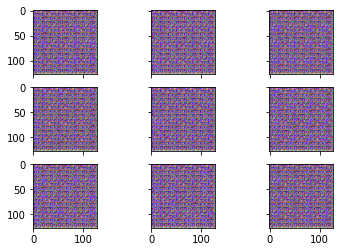

<Figure size 216x216 with 0 Axes>

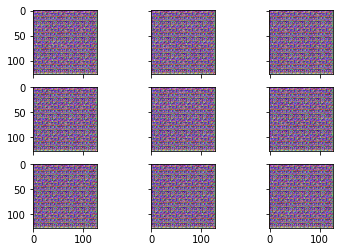

<Figure size 216x216 with 0 Axes>

In [ ]:
for iteration in range(config.ITERATIONS):
    # Collect batch
    random_indicies = np.random.choice(
        len(data_images),
        size=config.BATCH_SIZE,
        replace=False)
    real_image_batch = np.array([data_images[i] for i in random_indicies]) / 127.5 - 1.0 # rescale [-1, 1]
    
    # Random batch of fake images
    z_fake = tf.random.normal([config.BATCH_SIZE, config.Z_DIM])
    generated_images = generator.predict(z_fake)
    
    discriminator.trainable = False
    # Train discriminator
    discriminator_real_loss = discriminator.train_on_batch(real_image_batch, real_labels)
    discriminator_fake_loss = discriminator.train_on_batch(generated_images, fake_labels)
    
    # Get discriminator loss and accuracy
    discriminator_loss, accuracy = 0.5 * np.add(discriminator_real_loss, discriminator_fake_loss)
    
    # Train generator
    z_fake = tf.random.normal([config.BATCH_SIZE, config.Z_DIM])
    generated_images = generator.predict(z_fake)
    
    # Get generator loss and accuracy
    gan_loss = dcgan.train_on_batch(z_fake, real_labels)
    
    # Append data
    discriminator_losses.append(discriminator_loss)
    gan_losses.append(gan_loss)
    
    # Progress output
    if (iteration + 1) % config.SAMPLE_INTERVAL == 0:
        print("Iteration %d, [D loss: %f, acc.:%.2f%%] [G loss: %f]" %( iteration+1, discriminator_loss, 100.0*accuracy, gan_loss))
        
        # Generate random images
        z_generated = tf.random.normal([3*3, 128])
        generate_images = generator.predict(z_generated)
        generate_images = generate_images * 255
        
        # Plot
        fig = plt.figure(figsize=(3, 3))
        fig, axs = plt.subplots(3, 3, sharex=True, sharey=True)
        
        cnt = 0
        for i in range(3):
            for j in range(3):
                # Get images from batch at index 'cnt'
                axs[i, j].imshow(generate_images[cnt])
                cnt += 1
        plt.savefig(f'{config.MODEL_FOLDER_NAME}/predictions/{iteration+1}.png')

In [ ]:
plt.clf()
save_plot(discriminator_losses, 'Discriminator Loss', config.MODEL_FOLDER_NAME, 'discriminator_loss')

In [ ]:
plt.clf()
save_plot(gan_losses, 'Gan Loss', config.MODEL_FOLDER_NAME, 'gan_loss')